In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linera Regression on our own

In [3]:
pizza_diams = np.array([6,8,10,14,18])
pizza_price = np.array([7,9,13,17.5,18])

In [20]:
def bar(array):
    return sum(array) / len(array)

In [32]:
def var(array):
    b = bar(array)
    summ = 0
    for num in array:
        summ += (num - b) ** 2
    return summ / (len(array) - 1)

In [23]:
def cov(a1, a2):
    bar1 = bar(a1)
    bar2 = bar(a2)
    summ = 0
    for n1, n2 in zip(a1, a2):
        summ += (n1 - bar1) * (n2 - bar2)
    return summ / (len(a1) - 1)

In [27]:
def slope(x, y):
    return (cov(x,y) / var(x))

In [29]:
xbar= bar(pizza_diams)
ybar = bar(pizza_price)

In [34]:
m = slope(pizza_diams, pizza_price)
print(m)

0.976293103448


In [33]:
b = ybar - m*xbar
print(b)

1.96551724138


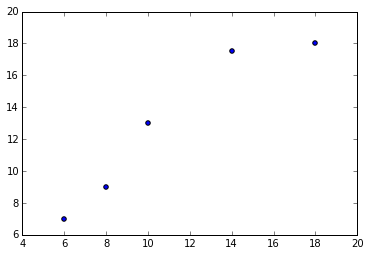

In [40]:
plt.scatter(pizza_diams, pizza_price)

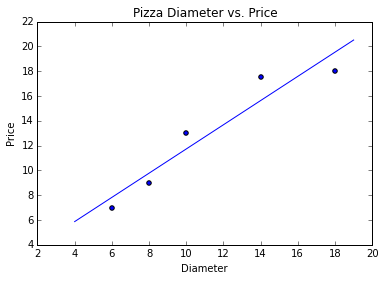

In [43]:
xVals = np.arange(4, 20, 1)
yVals = m*xVals + b

plt.scatter(pizza_diams, pizza_price)
plt.plot(xVals, yVals)

plt.xlabel("Diameter")
plt.ylabel("Price")
plt.title("Pizza Diameter vs. Price")

In [45]:
def priceOfPizza(diameter):
    return m*diameter + b

In [50]:
print(priceOfPizza(17))
print(priceOfPizza(10))
print(priceOfPizza(30))


18.5625
11.7284482759
31.2543103448


# Scikit Learn Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

pizza_diams_m = pizza_diams.reshape(5,1)
pizza_price_m = pizza_price.reshape(5,1)

rgm = LinearRegression()
rgm.fit(pizza_diams_m,pizza_price_m)

print(rgm.coef_, rgm.intercept_)
print(pizza_diams_m)

[[ 0.9762931]] [ 1.96551724]
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]


In [49]:
rgm.score(pizza_diams_m,pizza_price_m)
X_test = np.array([8,9,11,16,12]).reshape(5,1)
Y_test = np.array([11,8.5,15,18,11]).reshape(5,1)
rgm.score(X_test,Y_test)
rgm.score(X_test,Y_test)

0.6620052929422553

In [51]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

boston = load_boston()

In [68]:
xTrain, xTest, yTrain, yTest = train_test_split(boston.data, boston.target, test_size = 0.33)
rgm = LinearRegression()
rgm.fit(xTrain, yTrain)
yPred = rgm.predict(xTrain)

print(rgm.score(xTest, yTest))

0.753842770168


In [69]:
print(rgm.coef_, rgm.intercept_)

[ -1.15340739e-01   4.74399940e-02  -4.63797511e-02   3.18851819e+00
  -1.88758879e+01   4.04040209e+00  -9.05637564e-03  -1.62133492e+00
   2.83529810e-01  -9.85007710e-03  -7.58563311e-01   1.13989798e-02
  -4.88562926e-01] 31.821575189


In [72]:
# bos = pd.DataFrame(boston.data)
# bos.columns = boston.feature_names
# bos['PRICE'] = boston.target

In [71]:
# X = bos.drop('PRICE', axis = 1)

# lm = LinearRegression()
# lm.fit(X, bos.PRICE)

In [70]:
# pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoeffs'])